In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=30

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "sugarcane",
    seed=123,
    shuffle=True,
    image_size=(256,256),
    batch_size=BATCH_SIZE
)

Found 6748 files belonging to 11 classes.


In [4]:
class_names = dataset.class_names
class_names

['Banded Chlorosis',
 'Brown Spot',
 'BrownRust',
 'Dried Leaves',
 'Grassy shoot',
 'Healthy Leaves',
 'Pokkah Boeng',
 'Sett Rot',
 'Viral Disease',
 'Yellow Leaf',
 'smut']

In [5]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 7 1 1 5 8 3 0 2 8 1 4 7 9 2 0 2 1 6 0 2 9 9 8 9 1 1 1 9 1 9 9]


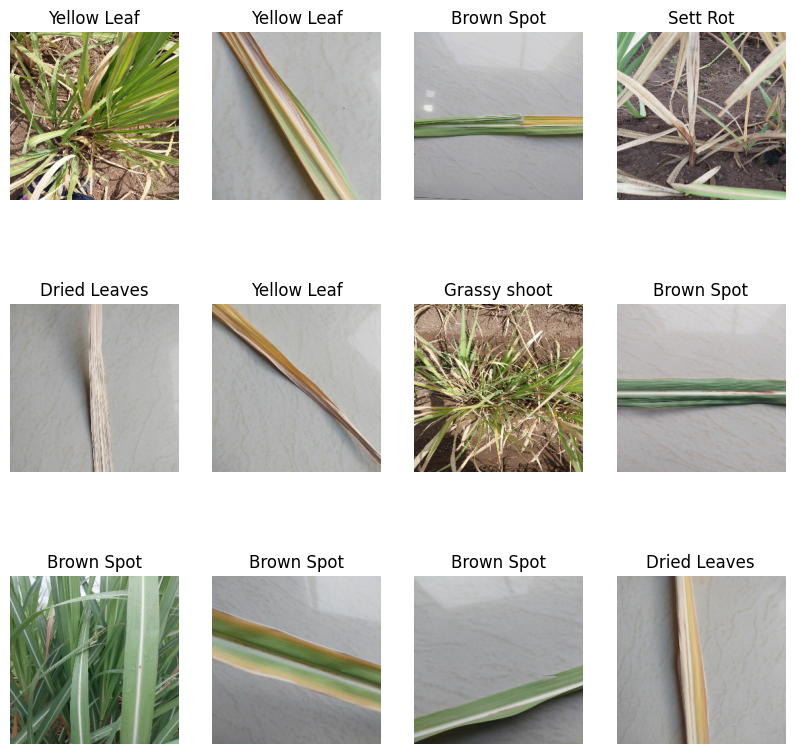

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

211

In [8]:
train_size = 0.8
len(dataset)*train_size

168.8

In [9]:
train_ds = dataset.take(168)
len(train_ds)

168

In [11]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=7000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [12]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [13]:
len(train_ds)

168

In [14]:

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [16]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [18]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 11

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [19]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                     ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)          │ (32, 256, 256, 3)        │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)                │ (32, 254, 254, 32)       │           896 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)   │ (32, 127, 127, 32)       │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)                │ (32, 125, 125, 64)       │        18,496 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)   │ (32, 62, 62, 64)         │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)                │ (32, 60, 60, 64)         │        36,928 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)   │ (32, 30, 30, 64)         │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)                │ (32, 28, 28, 64)         │        36,928 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)   │ (32, 14, 14, 64)         │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)               │ (32, 12, 12, 64)         │        36,928 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D)  │ (32, 6, 6, 64)           │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)               │ (32, 4, 4, 64)           │        36,928 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D)  │ (32, 2, 2, 64)           │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ flatten_1 (Flatten)              │ (32, 256)                │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_2 (Dense)                  │ (32, 64)                 │        16,448 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_3 (Dense)                  │ (32, 11)                 │           715 │
└──────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 184,267 (719.79 KB)

 Trainable params: 184,267 (719.79 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
)

Epoch 1/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.2489 - loss: 2.1882 - val_accuracy: 0.3571 - val_loss: 1.8270
Epoch 2/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.4118 - loss: 1.6737 - val_accuracy: 0.5372 - val_loss: 1.3638
Epoch 3/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 138s 820ms/step - accuracy: 0.5397 - loss: 1.3148 - val_accuracy: 0.6830 - val_loss: 0.9260
Epoch 4/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 131s 780ms/step - accuracy: 0.6847 - loss: 0.9247 - val_accuracy: 0.7768 - val_loss: 0.7241
Epoch 5/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 136s 809ms/step - accuracy: 0.7641 - loss: 0.6838 - val_accuracy: 0.8259 - val_loss: 0.4981
Epoch 6/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 134s 795ms/step - accuracy: 0.8440 - loss: 0.4646 - val_accuracy: 0.8438 - val_loss: 0.4348
Epoch 7/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 134s 795ms/step - accuracy: 0.8609 - loss: 0.3905 - val_accuracy: 0.8750 - val_loss: 0.3253
Epoch 8/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 132s 788ms/step - accuracy: 0.8778 - loss:

In [23]:
scores = model.evaluate(test_ds)

22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.9463 - loss: 0.1050


In [24]:
scores

[0.10802729427814484, 0.9375]

In [25]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 168}

In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [28]:
type(history.history['loss'])

list

In [29]:
len(history.history['loss'])

30

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

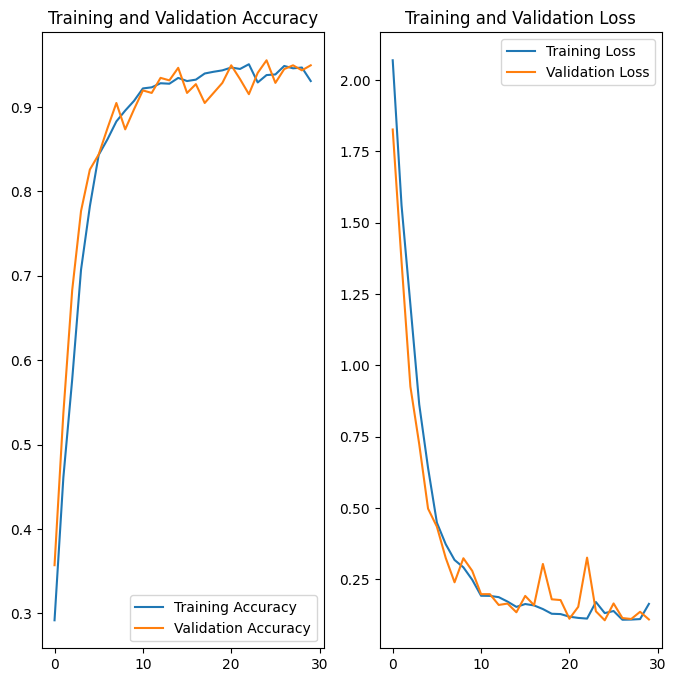

In [31]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Pokkah Boeng
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
predicted label: Pokkah Boeng


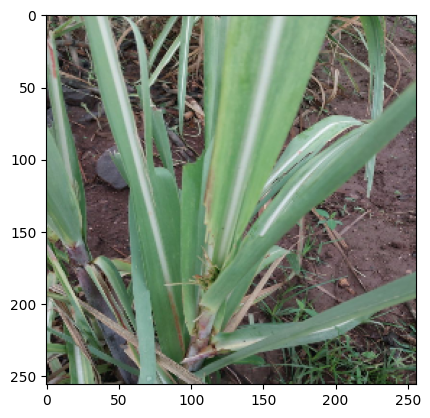

In [33]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


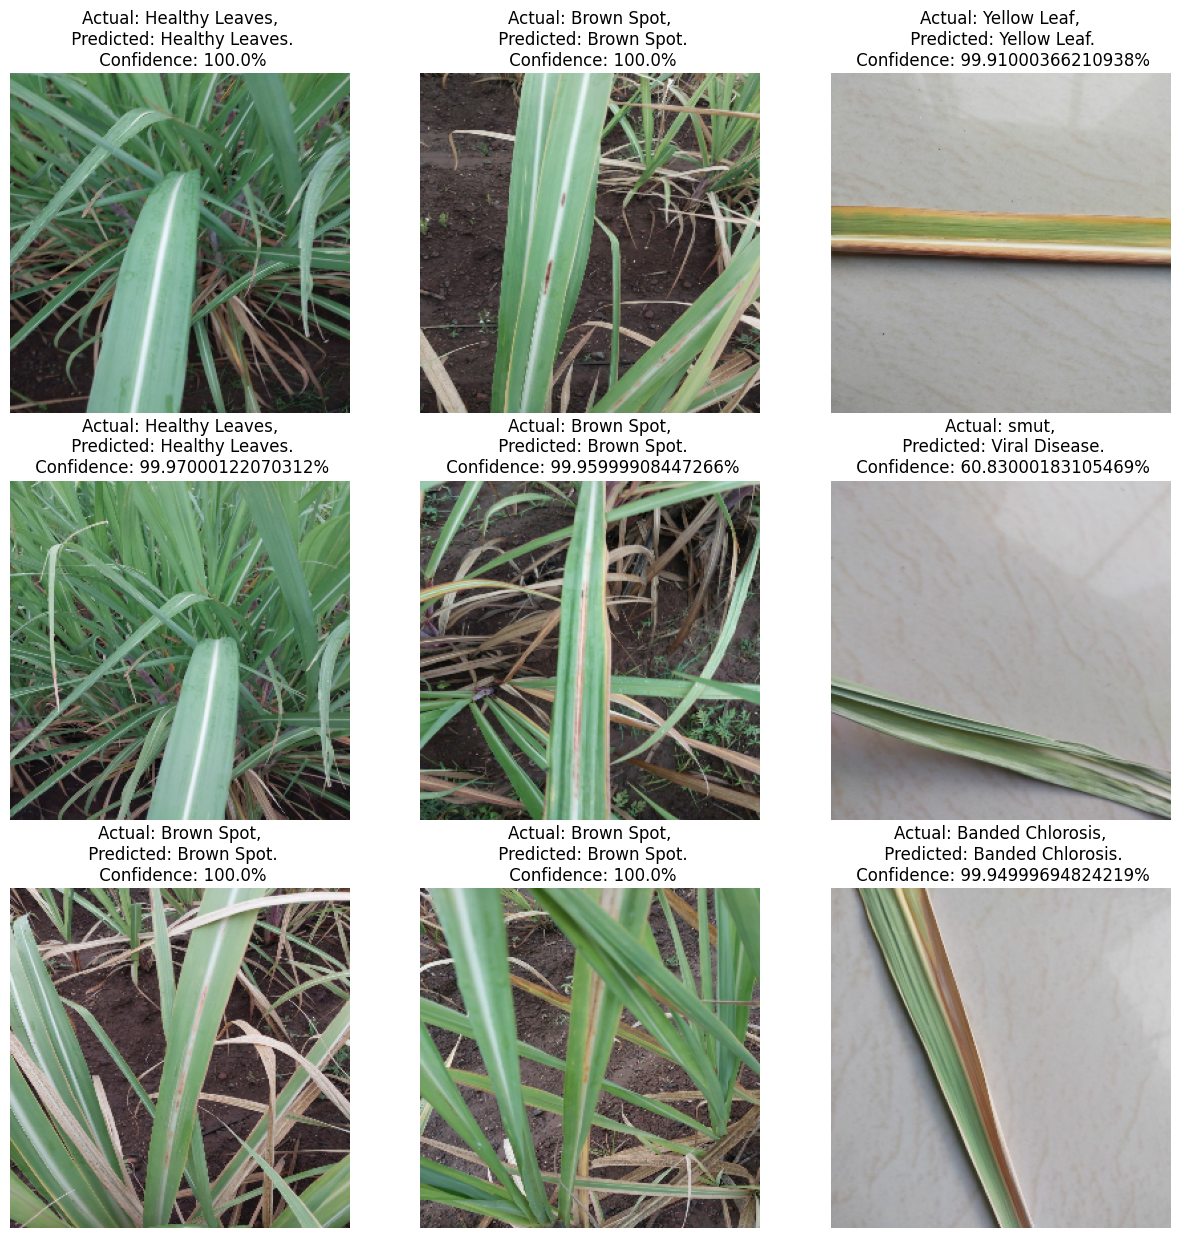

In [36]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [56]:
model.save('models/my_model.keras')

In [57]:
model_version=1
model.export(f"./models/{model_version}") 

INFO:tensorflow:Assets written to: ./models/1\assets


INFO:tensorflow:Assets written to: ./models/1\assets


Saved artifact at './models/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_20')
Output Type:
  TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)
Captures:
  2177383347216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2177383347792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2177383348368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2177383348944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2177383348176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2177383349712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2177383349136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2177383349904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2177383349520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2177383346448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2177345373008: TensorSpec(shape=(), 